### Importing Dependencies

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans   

### Data Collection and Loading

In [55]:
# Loading File using read_csv() method
customer_data = pd.read_csv("Dataset/Mall_Customers.csv")

In [56]:
#Let's have a preview of the dataset
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Exploratory Data Analysis

In [57]:
#Let's See How many Rows and Columns Exist
row, col = customer_data.shape
print(f"Number of Rows: {row}\nNumber of Columnss: {col}")

Number of Rows: 200
Number of Columnss: 5


In [58]:
 #Delving Deep into Information about the DataFrame
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


- It is evident from the data that there is no need for missing value handilg cause 200 out of 200 rows are Non-Null for all the given features.

In [59]:
#Explicitely Calculating Missing Values
customer_data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [60]:
#Let's look into some of the Summary Statistics
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Feature Extraction 

In [61]:
customer_data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [62]:
#Taking only last two columns for clustering
X1 = customer_data[["Annual Income (k$)",'Spending Score (1-100)']]
X1.shape

(200, 2)

### Choosing the Number of Clusters

- `Within Cluster Sum of Squares(WCSS)` - will help us deciding that hyperparameter using elbow plot.
$$
WCSS = \sum_{i=1}^{k} \sum_{x_j \in C_i} (x_j - \mu_i)^2
$$

In [63]:
#Finding WCSS Value for upto 10 Clusters
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init="k-means++",random_state=0)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)

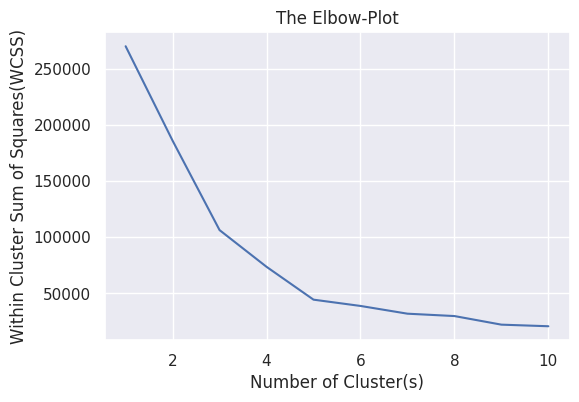

In [64]:
# Creating Elbow-Plot
sns.set_theme()
plt.figure(figsize=(6,4))
plt.plot(range(1,11),wcss)
plt.title("The Elbow-Plot")
plt.xlabel("Number of Cluster(s)")
plt.ylabel("Within Cluster Sum of Squares(WCSS)")
plt.show()


-The Optimum number of Clusters will be 5

### K-Means Clustering Model Training 

In [65]:
# Finalling fitting the model with 5 Clusters
fitKmeans = KMeans(n_clusters=5,init="k-means++",random_state= 0)

In [66]:
# Let's see how each data points are clustered
cluster = fitKmeans.fit_predict(X1)
cluster

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

### Cluster Visualization

In [70]:
# Incorporating Cluster in the DataFrame
customer_data["Cluster"] = cluster
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3


In [77]:
#Let's segregate the data as per cluster
cluster_range = range(5)
df0 = customer_data.loc[customer_data["Cluster"] == 0]
df1 = customer_data.loc[customer_data["Cluster"] == 1]
df2 = customer_data.loc[customer_data["Cluster"] == 2]
df3 = customer_data.loc[customer_data["Cluster"] == 3]
df4 = customer_data.loc[customer_data["Cluster"] == 4]

In [80]:
df0.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Cluster'],
      dtype='object')

In [95]:
# Segregating Clusters
centroids = fitKmeans.cluster_centers_
x_centre=[]
y_centre=[]
for i in range(len(centroids)):
    x_centre.append(centroids[i][0])
    y_centre.append(centroids[i][1])

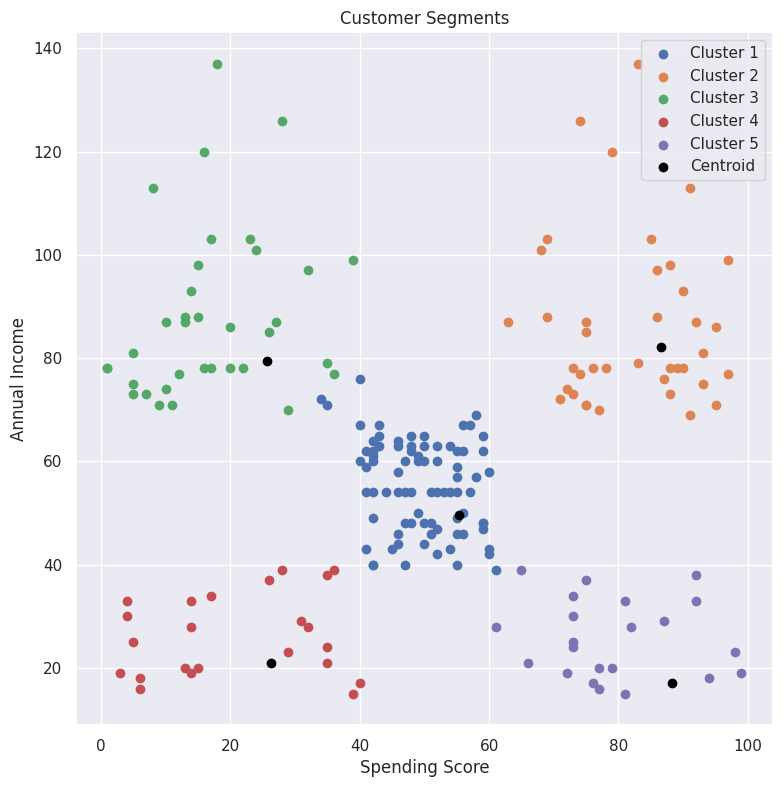

In [104]:
# Creating Cluster Visualization
plt.figure(figsize=(9,9))
plt.title("Customer Segments")
plt.scatter(df0['Spending Score (1-100)'],df0['Annual Income (k$)'],label="Cluster 1")
plt.scatter(df1['Spending Score (1-100)'],df1['Annual Income (k$)'],label="Cluster 2")
plt.scatter(df2['Spending Score (1-100)'],df2['Annual Income (k$)'],label="Cluster 3")
plt.scatter(df3['Spending Score (1-100)'],df3['Annual Income (k$)'],label="Cluster 4")
plt.scatter(df4['Spending Score (1-100)'],df4['Annual Income (k$)'],label="Cluster 5")
plt.scatter(x_centre,y_centre,c="black", label="Centroid")
plt.xlabel("Spending Score")
plt.ylabel("Annual Income")
plt.legend()
plt.show()